In [ ]:
from gtfs_merida import GTFSMerida
from calcula_indicadores import get_correlacion_gtfs, \
    get_poblacion_atendida_from_gtfs, FIG_SIZE, \
    get_waiting_times_gtfs
import geopandas as gpd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
datos = "../datos"
gtfs_file_base = f"{datos}/GTFS/gtfs-merida.zip"
gtfs_file_treatment = f"{datos}/GTFS/gtfs_merida_fake.zip"
zonas_path = f"{datos}/od_celular/zonificacion.gpkg"
gtfs_base = GTFSMerida(gtfs_file_base)
gtfs_treatment = GTFSMerida(gtfs_file_treatment)
path_rutas_base = f"{datos}/rutas_merida_geo/rutas_merida.geojson"
path_rutas_treatment = f"{datos}/rutas_merida_geo/rutas_merida.geojson"
path_paradas_base = f"{datos}/rutas_merida_geo/paradas_merida.geojson"
path_paradas_treatment = f"{datos}/rutas_merida_geo/paradas_merida.geojson"
rutas_base = gtfs_base.get_rutas()
rutas_treatment = gtfs_treatment.get_rutas()
paradas_base = gpd.read_file(path_paradas_base)
paradas_treatment = gpd.read_file(path_paradas_treatment)
od_path = f"{datos}/od_celular/Matriz_OD_Movilidad_Merida.csv"
ouput_folder = f"{datos}/calculos_gtfs"
imgs_folder = "images"


In [23]:
correlacion_od_base = get_correlacion_gtfs(gtfs_base, zonas_path, od_path)
correlacion_od_treatment = get_correlacion_gtfs(gtfs_treatment, zonas_path, od_path)

Número de paradas 4139
Número de viajes 908524
Número de paradas 4159
Número de viajes 908544


<Axes: xlabel='hora'>

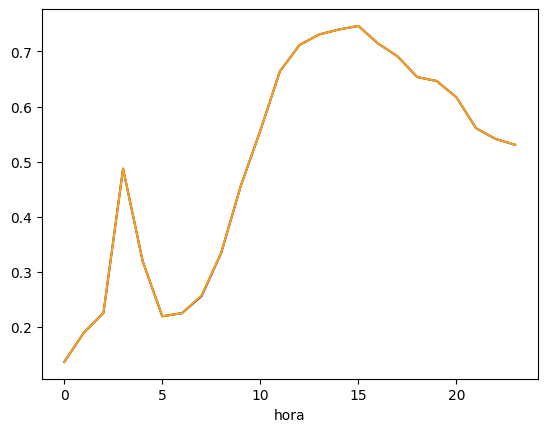

In [18]:
fig, ax = plt.subplots()
correlacion_od_base.set_index('hora')["correlacion"].plot(ax=ax, label='Base', color='blue')
correlacion_od_treatment.set_index('hora')["correlacion"].plot(ax=ax, label='Tratamiento', color='orange')


archivo guardado en ../datos/calculos_gtfs/manzanas_rutas_atendidas_base.gpkg
archivo guardado en ../datos/calculos_gtfs/manzanas_rutas_atendidas_treatment.gpkg
Población atendida a 5 minutos (base): 854124
Población atendida a 5 minutos (treatment): 872816


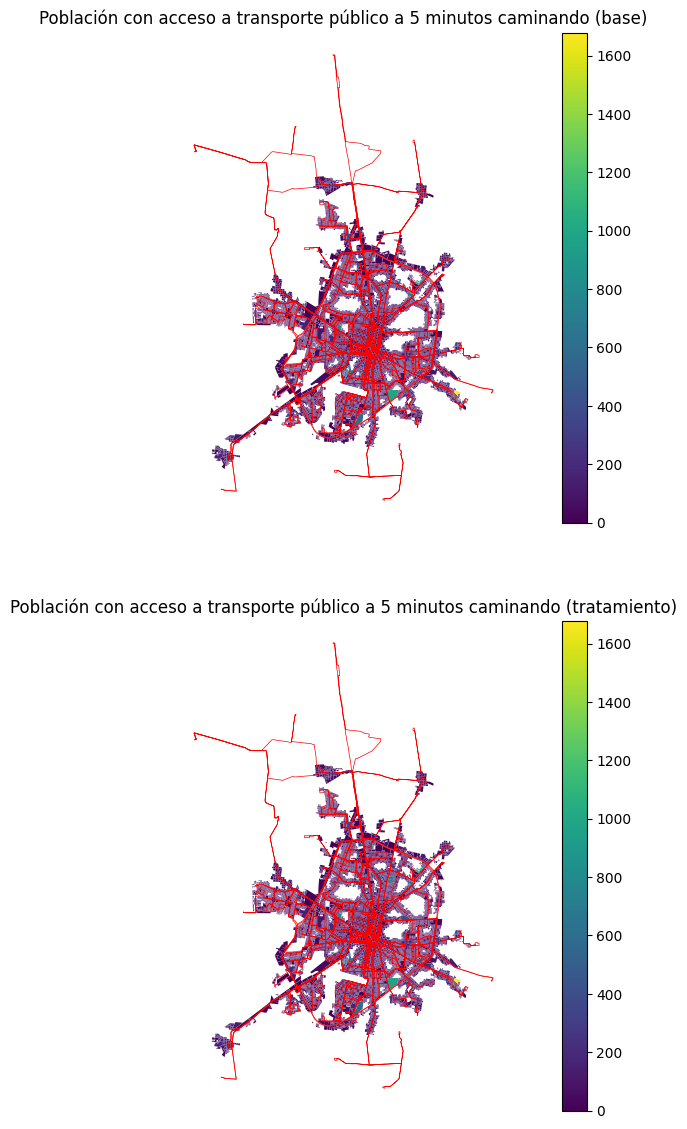

In [28]:
# Población atendida por manzanas
t = 5
manz_rutas_atendidas_base = get_poblacion_atendida_from_gtfs(gtfs_base, t=t)
manz_rutas_atendidas_base.to_file(f"{ouput_folder}/manzanas_rutas_atendidas_base.gpkg", driver="GPKG")
print(f"archivo guardado en {ouput_folder}/manzanas_rutas_atendidas_base.gpkg")
manz_rutas_atendidas_treatment = get_poblacion_atendida_from_gtfs(gtfs_treatment, t=t)
manz_rutas_atendidas_treatment.to_file(f"{ouput_folder}/manzanas_rutas_atendidas_treatment.gpkg", driver="GPKG")
print(f"archivo guardado en {ouput_folder}/manzanas_rutas_atendidas_treatment.gpkg")

# mapa de población atendida
fig, (ax1, ax2) = plt.subplots(2, 1)
manz_rutas_atendidas_base.plot(column='POBTOT', ax=ax1, legend=True, cmap="viridis")
rutas_base.plot(ax=ax1, color="red", linewidth=0.5)
ax1.set_title('Población con acceso a transporte público a 5 minutos caminando (base)')
ax1.set_axis_off()

manz_rutas_atendidas_treatment.plot(column='POBTOT', ax=ax2, legend=True, cmap="viridis")
ax2.set_title('Población con acceso a transporte público a 5 minutos caminando (tratamiento)')
ax2.set_axis_off()
rutas_treatment.plot(ax=ax2, color="red", linewidth=0.5)
fig.set_size_inches(FIG_SIZE)
fig.savefig(f"{imgs_folder}/mapa_poblacion_atendida.png", bbox_inches="tight", dpi=600)

pob_atendida_base = manz_rutas_atendidas_base["POBTOT"].sum()
print(f"Población atendida a {t} minutos (base): {pob_atendida_base}")
pob_atendida_treatment = manz_rutas_atendidas_treatment["POBTOT"].sum()
print(f"Población atendida a {t} minutos (treatment): {pob_atendida_treatment}")


Número de paradas 4139
archivo guardado en ../datos/calculos_gtfs/manzanas_tiempo_promedio_base.gpkg
Número de paradas 4159
archivo guardado en ../datos/calculos_gtfs/manzanas_tiempo_promedio_treatment.gpkg
Tiempo promedio de espera en paraderos a 5 minutos (base) 5.000641338582812
Tiempo promedio de espera en paraderos a 5 minutos (treatment) 5.000641338582813


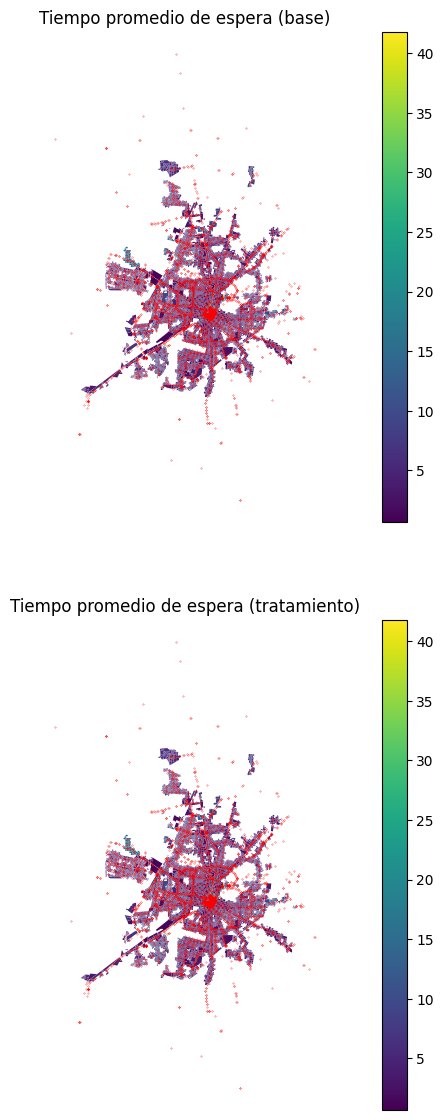

In [ ]:
# Tiempo promedio de espera en paraderos
manzanas_tiempo_promedio_base = get_waiting_times_gtfs(gtfs_base, t)
manzanas_tiempo_promedio_base.to_file(f"{ouput_folder}/manzanas_tiempo_promedio_base.gpkg", driver="GPKG")
print(f"archivo guardado en {ouput_folder}/manzanas_tiempo_promedio_base.gpkg")

manzanas_tiempo_promedio_treatment = get_waiting_times_gtfs(gtfs_treatment, t)
manzanas_tiempo_promedio_treatment.to_file(f"{ouput_folder}/manzanas_tiempo_promedio_treatment.gpkg", driver="GPKG")
print(f"archivo guardado en {ouput_folder}/manzanas_tiempo_promedio_treatment.gpkg")

print(f"Tiempo promedio de espera en paraderos a {t} minutos (base)", manzanas_tiempo_promedio_base["mean_time"].mean())
print(f"Tiempo promedio de espera en paraderos a {t} minutos (treatment)", manzanas_tiempo_promedio_treatment["mean_time"].mean())

# mapas de tiempo promedio de espera
MARKER_SIZE = 0.05
fig, (ax1, ax2) = plt.subplots(2, 1)
manzanas_tiempo_promedio_base.plot(column='mean_time', ax=ax1, legend=True, cmap="viridis")
paradas_base.plot(ax=ax1, color="red", markersize=MARKER_SIZE)
ax1.set_title('Tiempo promedio de espera (base)')
ax1.set_axis_off()

manzanas_tiempo_promedio_treatment.plot(column='mean_time', ax=ax2, legend=True, cmap="viridis")
paradas_treatment.plot(ax=ax2, color="red", markersize=MARKER_SIZE)
ax2.set_title('Tiempo promedio de espera (tratamiento)')
ax2.set_axis_off()
fig.set_size_inches(FIG_SIZE)
fig.savefig(f"{imgs_folder}/mapa_tiempo_promedio_espera.png", bbox_inches="tight", dpi=600)

In [ ]:
# feed time series
fts_base = gtfs_base.get_feed_ts()
fts_base.to_csv(f"{ouput_folder}/feed_time_series_base.csv")
print(f"archivo guardado en {ouput_folder}/feed_time_series_base.csv")
fts_treatment = gtfs_treatment.get_feed_ts()
fts_treatment.to_csv(f"{ouput_folder}/feed_time_series_treatment.csv")
print(f"archivo guardado en {ouput_folder}/feed_time_series_treatment.csv")
